## Assignment 3

### Question 1. Crowdfunding data from Kickstarter [15 points]
The objective of this assignment is to understand projects on the crowdfunding website Kickstarter. I provide you a Crowdfunding data file (ks-projects-sample.csv). This data is a random sample of 200 US projects based on a dataset from https://www.kaggle.com/kemical/kickstarter-projects. 

Variable Definitions

- Name: the name of the crowdfunding project
- Category/Main category: the category that the project belongs to
- Start: the date on which the fundraising campaign starts
- End: the date on which the fundraising campaign ends
- Year: the year in which the fundraising campaign ends
- Goal: the fundraising goal of the crowdfunding project
- Pledged: the amount of money raised by the project
- Currency: the currency in which Goal and Pledged are quoted
- Backers: the number of people who have supported the project

#### a) Plot the number of projects and the amount of funding raised (pledged) by the year in which the fundraising campaign ended. Do you see any trend over years? [3 points]

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
crowdf = pd.read_csv("ks-projects-sample.csv")
crowdf.head()

,name,category,main_category,currency,start,end,year,goal,pledged,backers
0,"HELIO: Incredible Brightness, Ultra Lightness.",Design,Design,USD,5/3/17,7/2/17,2017,10000,68033.0,1225
1,Artist Residency @ Vermont Studio Center,Painting,Art,USD,2/20/13,3/22/13,2013,1500,2173.0,21
2,ARTSi - Complete Your iPad 2 / New iPad Painti...,Product Design,Design,USD,7/11/12,8/30/12,2012,53000,348.0,11
3,Sidereal Calendar Year 413: Kemetic Societies ...,Publishing,Publishing,USD,8/15/13,8/26/13,2013,5500,5965.0,100
4,Unseen world of Colorado,Photography,Photography,USD,5/10/14,5/31/14,2014,5000,0.0,0


In [12]:
crowdf_group = crowdf.groupby('year')

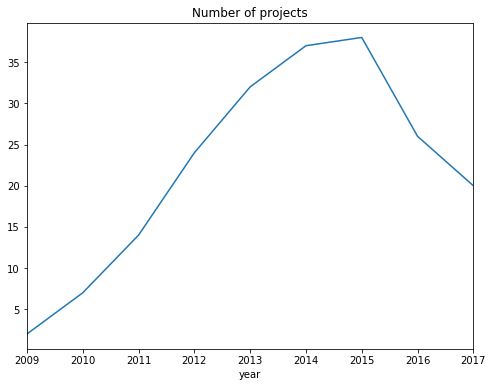

In [13]:
crowdf_group['name'].count().plot(figsize=(8,6),title='Number of projects')

The number of projects increased from 2009 to 2015, reached plateau during 2014-2015, and dropped from 2015-2017.

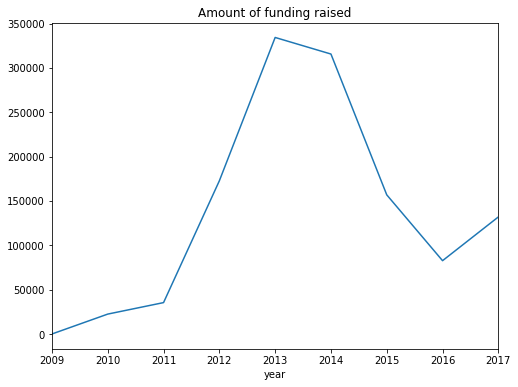

In [14]:
crowdf_group['pledged'].sum().plot(figsize=(8,6),title='Amount of funding raised')

The amount of funding raised has been increasing from 2009 to 2013 with a rapid increase since 2011. However, the amount during 2013-2016 and started to increase again since 2016.

### b) calculate and report summary statistics (mean, median, and standard deviation) for these variables: goal, pledged, backers. [3 points]


In [15]:
crowdf['goal'].describe()

count    2.000000e+02
mean     3.453593e+04
std      2.250444e+05
min      5.000000e+00
25%      2.500000e+03
50%      6.000000e+03
75%      1.425000e+04
max      3.000000e+06
Name: goal, dtype: float64

The fund raising goal has a mean of 34535.93 USD, with a median value of 6000 USD and a standard deviation of 225044.4 USD.

In [16]:
crowdf['pledged'].describe()

count       200.000000
mean       6258.928750
std       13830.669501
min           0.000000
25%          47.750000
50%         918.045000
75%        6034.760000
max      119321.000000
Name: pledged, dtype: float64

The fund raising goal has a mean of 6258.93 USD, with a median value of 918.05 USD and a standard deviation of 13830.67 USD.

### c) a project is successful if the amount of funding it raised is equal to or greater than the goal. How many projects were successful based on this definition? [2 points]

In [17]:
crowdf['success'] = (crowdf.pledged >= crowdf.goal)
crowdf.head()

,name,category,main_category,currency,start,end,year,goal,pledged,backers,success
0,"HELIO: Incredible Brightness, Ultra Lightness.",Design,Design,USD,5/3/17,7/2/17,2017,10000,68033.0,1225,True
1,Artist Residency @ Vermont Studio Center,Painting,Art,USD,2/20/13,3/22/13,2013,1500,2173.0,21,True
2,ARTSi - Complete Your iPad 2 / New iPad Painti...,Product Design,Design,USD,7/11/12,8/30/12,2012,53000,348.0,11,False
3,Sidereal Calendar Year 413: Kemetic Societies ...,Publishing,Publishing,USD,8/15/13,8/26/13,2013,5500,5965.0,100,True
4,Unseen world of Colorado,Photography,Photography,USD,5/10/14,5/31/14,2014,5000,0.0,0,False


In [18]:
sum(crowdf.success == True)

83

83 projects were successful out of the sample data.

## d) calculate the success rate over different years, plot the fraction of successful projects in each year. Do you see any trend? [3 points]

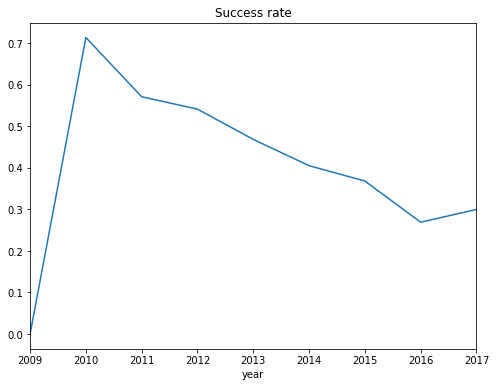

In [19]:
crowdf_group = crowdf.groupby('year')
crowdf_group['success'].mean().plot(figsize=(8,6),title='Success rate')

From the above figure, we can see that the success rate increased rapidly from 2009 to 2010 and reached the highest point in 2010. However, the success rate has been decreasing from 2010 to 2016 with a slow rebounce 2016-2017.

### e) choose your favorite project among these successful projects that you would invest and explain why you like the project. You can go to its website on Kickstarter and look at their demos. Can you provide some explanations why this project succeeded? [4 points] (Note that this part is an open-end question and please provide some insightful discussion based on thoughtful research on the project you choose. No more than 200 words).

In [20]:
crowdf['success_ratio'] = (crowdf.pledged/crowdf.goal)
crowdf.head()

,name,category,main_category,currency,start,end,year,goal,pledged,backers,success,success_ratio
0,"HELIO: Incredible Brightness, Ultra Lightness.",Design,Design,USD,5/3/17,7/2/17,2017,10000,68033.0,1225,True,6.803300
1,Artist Residency @ Vermont Studio Center,Painting,Art,USD,2/20/13,3/22/13,2013,1500,2173.0,21,True,1.448667
2,ARTSi - Complete Your iPad 2 / New iPad Painti...,Product Design,Design,USD,7/11/12,8/30/12,2012,53000,348.0,11,False,0.006566
3,Sidereal Calendar Year 413: Kemetic Societies ...,Publishing,Publishing,USD,8/15/13,8/26/13,2013,5500,5965.0,100,True,1.084545
4,Unseen world of Colorado,Photography,Photography,USD,5/10/14,5/31/14,2014,5000,0.0,0,False,0.000000


In [34]:
idx = crowdf['success_ratio'].idxmax(axis = 1) # row number of the project with higest success ratio

In [35]:
crowdf.iloc[idx] # pull out information of the project with the highest success ratio in the sample data

name             Photograph Postcard
category                 Photography
main_category            Photography
currency                         USD
start                        9/16/11
end                         10/16/11
year                            2011
goal                               5
pledged                           60
backers                            6
success                         True
success_ratio                     12
Name: 136, dtype: object

We chose the project with the highest pledge/goal success ratio (=12) as our favorate project to look at. Here is the description of this project https://www.kickstarter.com/projects/1520157104/photograph-postcard/description . This is a very simple project: A photographer found that people did not enjoy getting mails full of ads so he wanted to send people postcards made from his own photographs and mail it to people. From the consumers' perspective, there were several points that gave the project a high suceess ratio: **1. A large population of potential backers.** 5 USD is a very small amount of money that almost everyone who view the project is able to invest. **2. A good reason to initiate the project.** Receiving useless mails is a common phenomena and people would love to see a change for social good. **3. Professional service.** The postcard pictures were made from photos taken by a professional photographer. People could collect these postcards as a piece of art rather than a random postcard. **4. Founders' dedication.** Although it is a small project, the founder spent time making a short video about it which shows he is serious about the project and his revere to potential backers.